# Task A2.5: Gone with the Wind!  (3pts - Optional)

You are presented with a dataset of wind speed and the wind angle of the wind from a meteorological site. The problem is that some data while being so similar have values very differently. Angles are not ideal as model inputs since 360° and 0° should be in close proximity, smoothly transitioning. The direction becomes irrelevant when there is no wind blowing. (for example 0.1m/s at 359° is not represented well or the similarity of 10 m/s at 0.1° and 359.9°). The model will find it more straightforward to interpret if you transform the columns for wind direction and velocity into a wind vector (X and Y).

Download the weather dataset from here: Climate2016.csvDownload Climate2016.csv

We only focus on the columns "windvelo m/s" and "winddeg deg" which represent wind velocity and wind direction. See the data summary with the functions in the text to get the overview of the data

- Use mathematical functions to convert the Wind "speed&velocity" vector into two separate X & Y vectors. Add two more columns to your CSV file as windveloX and windveloY, and save your CSV file.
- Use the normalize function to normalize the data
- Use the "Hist2d" function to visualize the data before and after changes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("Climate2016.csv", "r", encoding="utf-8") as file:
    first_line = file.readline().strip()  
    clean_header = first_line.replace('"', '').split(",")

df = pd.read_csv("Climate2016.csv", delimiter=",", skiprows=1, names=clean_header)
df.to_csv("Climate2016.csv", index=False)

In [3]:
df_selected = df[["windvelo (m/s)", "winddeg (deg)"]].copy()
df_selected.describe()

,windvelo (m/s),winddeg (deg)
count,52260.000000,52260.000000
mean,2.035421,176.906237
std,1.541179,84.418589
min,0.100000,0.010000
25%,0.920000,130.000000
50%,1.630000,199.700000
75%,2.690000,234.300000
max,12.120000,360.000000


- Use mathematical functions to convert the Wind "speed&velocity" vector into two separate X & Y vectors. Add two more columns to your CSV file as windveloX and windveloY, and save your CSV file.

In [4]:
df_selected["winddeg_radians"] = np.radians(df_selected["winddeg (deg)"])

df_selected["wind_x"] = df_selected["windvelo (m/s)"] * np.cos(df_selected["winddeg_radians"])
df_selected["wind_y"] = df_selected["windvelo (m/s)"] * np.sin(df_selected["winddeg_radians"])

df["wind_x"] = df_selected["wind_x"]
df["wind_y"] = df_selected["wind_y"]

df.to_csv("Climate2016_transformed.csv", index=False)

- Use the normalize function to normalize the data


In [5]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df["wind_x_norm"] = normalize(df["wind_x"])
df["wind_y_norm"] = normalize(df["wind_y"])
print(df["wind_x_norm"].describe())


count    52260.000000
mean         0.544160
std          0.106867
min          0.000000
25%          0.503854
50%          0.546561
75%          0.592328
max          1.000000
Name: wind_x_norm, dtype: float64


- Use the "Hist2d" function to visualize the data before and after changes.

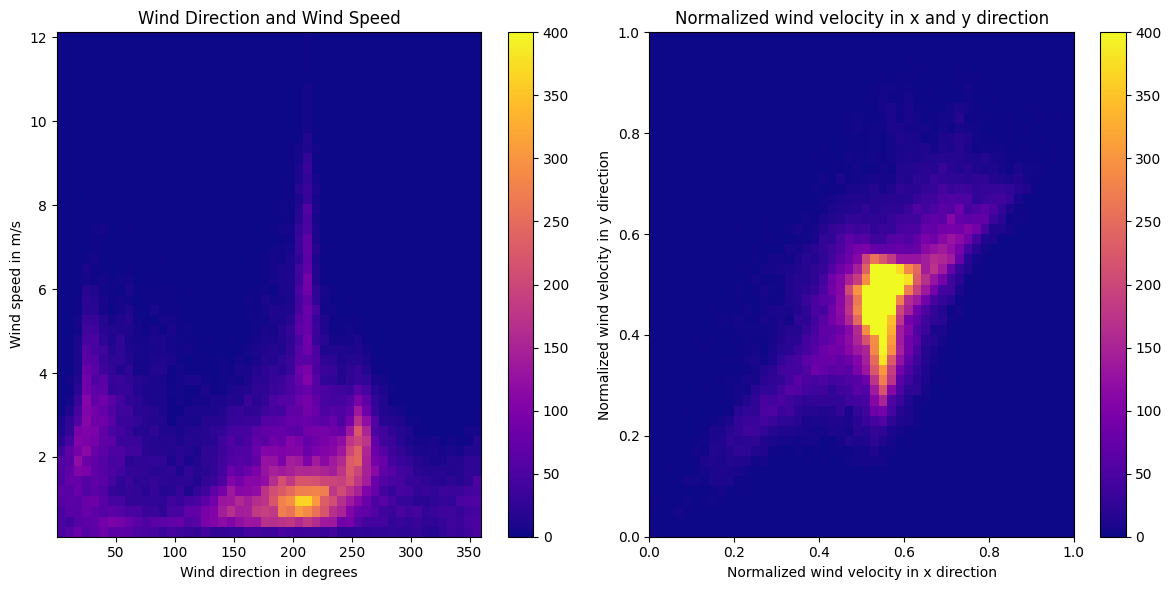

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

h1 = ax[0].hist2d(df["winddeg (deg)"], df["windvelo (m/s)"], bins=(50, 50), vmax=400, cmap="plasma")
ax[0].set_title("Wind Direction and Wind Speed")
ax[0].set_xlabel("Wind direction in degrees")
ax[0].set_ylabel("Wind speed in m/s")
plt.colorbar(h1[3], ax=ax[0])

h2 = ax[1].hist2d(df["wind_x_norm"], df["wind_y_norm"], bins=(50, 50), vmax=400, cmap="plasma")
ax[1].set_title("Normalized wind velocity in x and y direction")
ax[1].set_xlabel("Normalized wind velocity in x direction")
ax[1].set_ylabel("Normalized wind velocity in y direction")
plt.colorbar(h2[3], ax=ax[1])

plt.tight_layout()
plt.show()